### Pollution in Barcelona Eixample (2018 - 2023)
***
**Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('cont_bcn_eixample_18_23_ML.csv')

df

,year,month,day,CO,NO,NO2,O3,PM10,SO2,season_spring,season_summer,season_winter
0,2018,1,1,0.21,10.71,21.25,55.21,16.62,1.00,0,0,1
1,2018,1,2,0.36,20.00,37.42,36.79,16.17,2.00,0,0,1
2,2018,1,3,0.34,17.58,24.04,36.62,15.67,2.04,0,0,1
3,2018,1,4,0.31,15.92,26.96,32.33,17.12,1.96,0,0,1
4,2018,1,5,0.34,21.27,43.50,25.50,12.45,1.68,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2023,12,16,0.37,17.54,45.58,24.33,23.25,3.38,0,0,0
2025,2023,12,17,0.44,21.88,52.92,16.25,25.92,4.38,0,0,0
2026,2023,12,18,1.00,94.96,83.00,4.12,55.17,8.04,0,0,0
2027,2023,12,19,1.04,99.12,69.42,12.38,53.08,8.29,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           2029 non-null   int64  
 1   month          2029 non-null   int64  
 2   day            2029 non-null   int64  
 3   CO             2029 non-null   float64
 4   NO             2029 non-null   float64
 5   NO2            2029 non-null   float64
 6   O3             2029 non-null   float64
 7   PM10           2029 non-null   float64
 8   SO2            2029 non-null   float64
 9   season_spring  2029 non-null   int64  
 10  season_summer  2029 non-null   int64  
 11  season_winter  2029 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 190.3 KB


In [3]:
# Train-test

X = df.drop('NO2', axis=1)
y = df['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Crear el modelo

lir = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)

# Entrenar el modelo

lir.fit(X_train, y_train)
knr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Predicciones

y_pred_lir = lir.predict(X_test)
y_pred_knr = knr.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_mlp = mlp.predict(X_test)

# Evaluar el rendimiento

def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred).round(3)
    r2 = r2_score(y_test, y_pred).round(3)
    return mse, r2

resultados_lir = evaluar_modelo(lir, X_test, y_test)
resultados_knr = evaluar_modelo(knr, X_test, y_test)
resultados_dtr = evaluar_modelo(dtr, X_test, y_test)
resultados_rfr = evaluar_modelo(rfr, X_test, y_test)
resultados_mlp = evaluar_modelo(mlp, X_test, y_test)

# Resultados

print(f"LIR: {resultados_lir}")
print(f"KNR: {resultados_knr}")
print(f"DTR: {resultados_dtr}")
print(f"RFR: {resultados_rfr}")
print(f"MLP: {resultados_mlp}")

LIR: (68.849, 0.713)
KNR: (52.587, 0.781)
DTR: (79.592, 0.668)
RFR: (40.929, 0.829)
MLP: (49.292, 0.794)


In [4]:
# Hiperparámetros

rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [5]:
# Definición de hiperparámetros Random Forest Regressor

param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rfr, 
                           param_grid=param, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           error_score='raise')

# Entrenamient del modelo
grid_search.fit(X_train, y_train)

# Encontrar los mejores hiperparámetros 
best_param = grid_search.best_params_

# Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred_best_model = best_model.predict(X_test)

mse_best_model = mean_squared_error(y_test, y_pred_best_model).round(3)
r2_best_model = r2_score(y_test, y_pred_best_model).round(3)

print('Random Forest Regressor')
print(f'Mejores hiperparámetros: {best_param}')
print(f'MSE - Mejores hiperparámetros: {mse_best_model}')
print(f'R² - Mejores hiperparámetros: {r2_best_model}')

Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MSE - Mejores hiperparámetros: 40.549
R² - Mejores hiperparámetros: 0.831


In [7]:
#40.549 #0.831

# Definir el modelo lineal con los hiperparámetros anteriores

rfr_best_param = RandomForestRegressor(criterion='squared_error',
                                       max_depth=20,
                                       min_samples_leaf=2,
                                       min_samples_split=2,
                                       n_estimators=200 )

# Cross-validation
scores = cross_val_score(rfr_best_param, X, y, cv=5, scoring='r2').round(3)

# Resultados de R² por cada fold
print('R² por cada fold:', scores)

# Calcular la media y std de los resultados de R²
r2_mean = scores.mean().round(3)
r2_std = scores.std().round(3)

print('Media de R²:', r2_mean)
print('Desviación estándard de R²:', r2_std)

R² por cada fold: [0.723 0.867 0.751 0.711 0.631]
Media de R²: 0.737
Desviación estándard de R²: 0.076


In [9]:
# Accuracy

accuracy = rfr.score(X_test, y_test).round(3)

print(f'Random Forest Regressor tiene una acierto del {accuracy* 100:.1f}% de las ocasiones.')

Random Forest Regressor tiene una acierto del 82.9% de las ocasiones.


#### Predictions

In [12]:
rfr_best_param.fit(X, y)

input_data = pd.DataFrame([['2030', '1', '5', '0.40', '22', '30', '13', '2', '0', '0', '1']],
                           columns=df.drop('NO2', axis=1).columns)


prediccion_2030 = rfr_best_param.predict(input_data)


print(prediccion_2030)


[45.59618323]


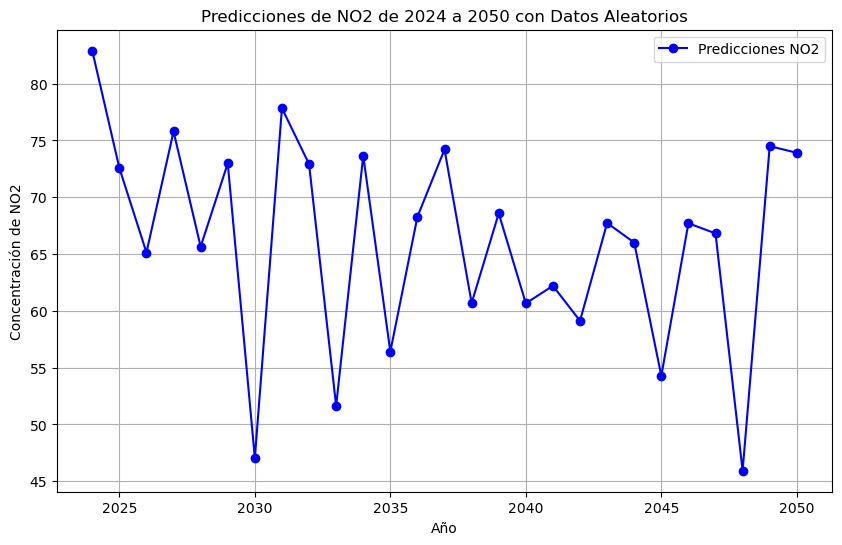

In [22]:
# Generar un rango de años
years_range = range(2024, 2051)

# Crear un DataFrame con fechas y datos aleatorios
fechas_prediccion = pd.DataFrame({'year': [year for year in years_range for _ in range(12)],
                                  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * len(years_range),
                                  'day': [1] * len(years_range) * 12,
                                  'CO': np.random.uniform(0.1, 0.8, len(years_range) * 12),
                                  'NO': np.random.uniform(20, 100, len(years_range) * 12),
                                  'O3': np.random.uniform(5, 50, len(years_range) * 12),
                                  'PM10': np.random.uniform(15, 50, len(years_range) * 12),
                                  'SO2': np.random.uniform(1, 10, len(years_range) * 12),
                                  'season_spring': [1 if month in [1, 2, 3] else 0 for month in range(1, 13) for _ in range(len(years_range))],
                                  'season_summer': [1 if month in [4, 5, 6] else 0 for month in range(1, 13) for _ in range(len(years_range))],
                                  'season_winter': [1 if month in [10, 11, 12] else 0 for month in range(1, 13) for _ in range(len(years_range))],
                                  })

# Realizar las predicciones
predicciones = rfr_best_param.predict(fechas_prediccion)

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(list(fechas_prediccion['year'].unique()), predicciones.reshape(-1, 12)[:, 0], marker='o', linestyle='-', color='b', label='Predicciones NO2')
plt.title('Predicciones de NO2 de 2024 a 2050 con datos aleatorios')
plt.xlabel('Año')
plt.ylabel('Concentración de NO2')
plt.legend()
plt.grid(True)
plt.show()